# Validator Environment Yields

In [1]:
import setup

time: 13.3 ms (started: 2021-04-20 11:49:24 +02:00)


In [2]:
import pandas as pd

time: 354 ms (started: 2021-04-20 11:49:24 +02:00)


In [3]:
from experiments.run import run
from experiments.post_processing import post_process
from experiments.validator_environment_yields.experiment import experiment
import visualizations as visualizations

time: 715 ms (started: 2021-04-20 11:49:25 +02:00)


In [4]:
results, exceptions = run(experiment)

Running experiment
Experiment complete
time: 2 s (started: 2021-04-20 11:49:26 +02:00)


In [5]:
df = pd.DataFrame(results)
df = post_process(df)
df

,eth_price,eth_supply,eth_staked,supply_inflation,average_effective_balance,number_of_validators_in_activation_queue,number_of_validators,number_of_validators_online,number_of_validators_offline,base_reward,...,diy_hardware_profit_yields,diy_cloud_profit_yields,pool_staas_profit_yields,pool_hardware_profit_yields,pool_cloud_profit_yields,staas_full_profit_yields,staas_self_custodied_profit_yields,supply_inflation_pct,total_revenue_yields_pct,total_profit_yields_pct
1,103.580247,1.120000e+08,524288,-4.972107e-08,4.336830e+09,230,120892,118479,2413,8944000.0,...,1.354643,1.561369,1.417472,1.482703,1.361961,1.369149,1.417472,-0.000005,161.076375,141.121741
2,107.160494,1.120010e+08,524288,7.540166e-03,4.336830e+09,230,120892,118479,2413,1118000.0,...,-0.046217,0.153602,0.177185,0.077565,-0.039144,0.171145,0.177185,0.754017,20.134663,8.166963
3,110.740741,1.120012e+08,524288,9.424740e-04,4.336830e+09,230,120892,118479,2413,1118000.0,...,-0.038213,0.155146,0.177185,0.081567,-0.031369,0.171145,0.177185,0.094247,20.134663,8.518727
4,114.320988,1.120013e+08,524288,9.424729e-04,4.336830e+09,230,120892,118479,2413,1118000.0,...,-0.030711,0.156593,0.177185,0.085318,-0.024081,0.171145,0.177185,0.094247,20.134663,8.848459
5,117.901235,1.120014e+08,524288,9.424718e-04,4.336830e+09,230,120892,118479,2413,1118000.0,...,-0.023664,0.157952,0.177185,0.088841,-0.017235,0.171145,0.177185,0.094247,20.134663,9.158164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,2985.679012,1.128964e+08,33600000,8.112239e-03,3.200000e+10,230,1050000,1029039,20961,1116800.0,...,0.026054,0.027026,0.023987,0.026656,0.026088,0.023169,0.023987,0.811224,2.725817,2.525698
1618,2989.259259,1.128975e+08,33600000,8.112159e-03,3.200000e+10,230,1050000,1029039,20961,1116800.0,...,0.026055,0.027026,0.023987,0.026657,0.026090,0.023169,0.023987,0.811216,2.725817,2.525761
1619,2992.839506,1.128986e+08,33600000,8.112079e-03,3.200000e+10,230,1050000,1029039,20961,1116800.0,...,0.026057,0.027026,0.023987,0.026658,0.026091,0.023169,0.023987,0.811208,2.725817,2.525824
1620,2996.419753,1.128997e+08,33600000,8.111999e-03,3.200000e+10,230,1050000,1029039,20961,1116800.0,...,0.026058,0.027027,0.023987,0.026658,0.026093,0.023169,0.023987,0.811200,2.725817,2.525887


time: 623 ms (started: 2021-04-20 11:49:28 +02:00)


In [6]:
df.subset.unique()

array([0, 1])

time: 20.5 ms (started: 2021-04-20 11:49:28 +02:00)


/Users/bscholtz/workspace/org-cadcad-edu/eth2.0-masterclass/venv/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



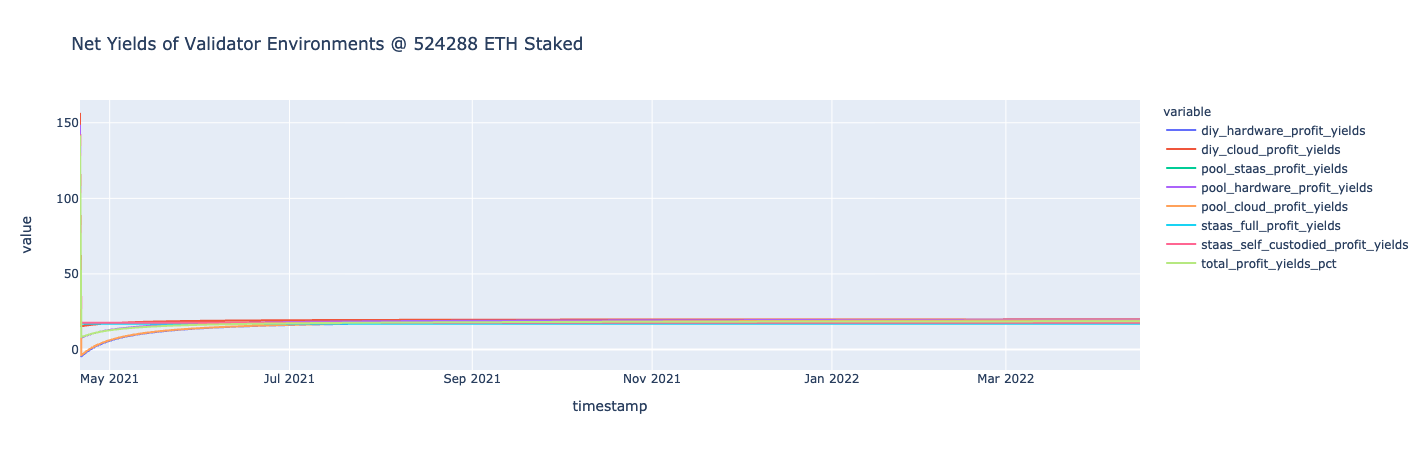

time: 329 ms (started: 2021-04-20 12:05:34 +02:00)


In [9]:
visualizations.plot_validator_environment_yields(df.query('subset == 0'))

/Users/bscholtz/workspace/org-cadcad-edu/eth2.0-masterclass/venv/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



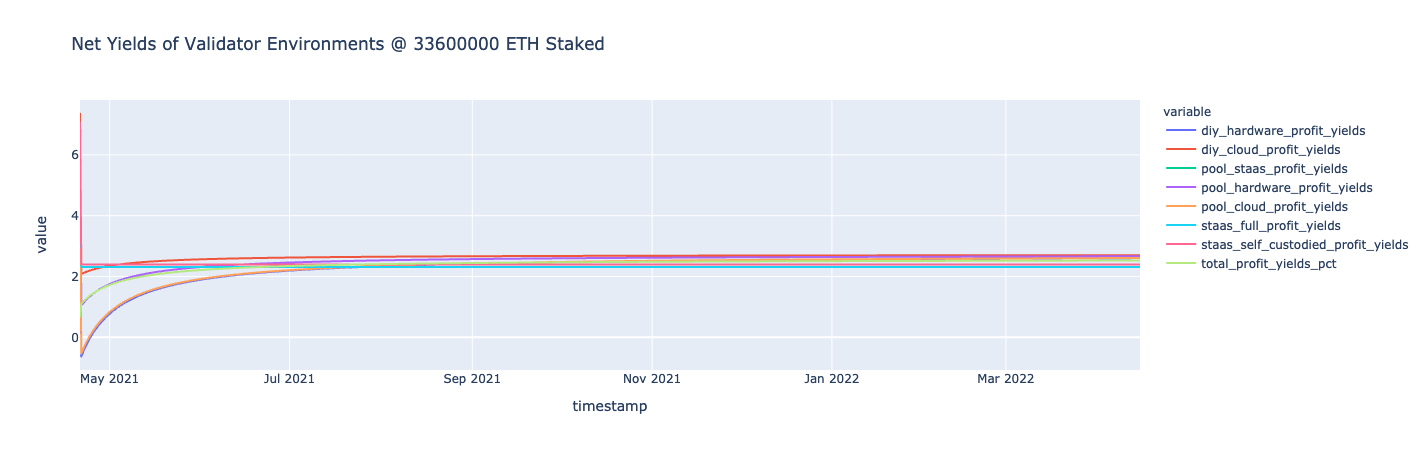

time: 322 ms (started: 2021-04-20 12:05:38 +02:00)


In [10]:
visualizations.plot_validator_environment_yields(df.query('subset == 1'))